
# **Prediksi Risiko Diabetes Menggunakan Algoritma Random Forest, KNN, dan Decision Tree**



Sumber dataset : (https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data)

Dataset : (https://drive.google.com/file/d/11-4ZWar5W35x0HJxauecVeNK7TtdiOv2/view?usp=sharing)



Kelompok 8:
1. ANI ROSIDAH (23031554046)
2. UMMUL KHOIRRO' SYARI (23031554074)




### **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, PowerTransformer



## a. jumlah baris dan kolom dalam dataset


In [ ]:
df = pd.read_csv("/content/diabetes_012_health_indicators_BRFSS2015.csv")
df.shape

(253680, 22)

## b. Gambaran dataset

In [ ]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,1.667220,0,0,0,0,0,...,1,0,2.253111,1.879074,1.141300,1,0,0.295241,4.0,-1.381324
1,0,0,0,0,-0.543101,0,0,0,0,0,...,0,1,0.374618,-0.454434,-0.516791,0,0,-0.351213,6.0,-2.337131
2,0,1,1,1,-0.101037,0,0,0,0,0,...,1,1,2.253111,3.434746,2.799391,1,0,0.295241,4.0,1.008193
3,0,1,0,1,-0.248391,0,0,0,0,0,...,1,0,-0.564629,-0.454434,-0.516791,0,0,0.941695,3.0,0.052387
4,0,1,1,1,-0.690456,0,0,0,0,0,...,1,0,-0.564629,-0.065516,-0.516791,0,0,0.941695,5.0,-0.903420


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229781 entries, 0 to 229780
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          229781 non-null  int64  
 1   HighBP                229781 non-null  int64  
 2   HighChol              229781 non-null  int64  
 3   CholCheck             229781 non-null  int64  
 4   BMI                   229781 non-null  float64
 5   Smoker                229781 non-null  int64  
 6   Stroke                229781 non-null  int64  
 7   HeartDiseaseorAttack  229781 non-null  int64  
 8   PhysActivity          229781 non-null  int64  
 9   Fruits                229781 non-null  int64  
 10  Veggies               229781 non-null  float64
 11  HvyAlcoholConsump     229781 non-null  float64
 12  AnyHealthcare         229781 non-null  int64  
 13  NoDocbcCost           229781 non-null  int64  
 14  GenHlth               229781 non-null  float64
 15  

In [ ]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,229781.000000,229781.000000,229781.000000,229781.000000,2.297810e+05,229781.0,229781.0,229781.0,229781.0,229781.0,...,229781.000000,229781.000000,2.297810e+05,2.297810e+05,2.297810e+05,229781.000000,229781.0,2.297810e+05,229781.000000,2.297810e+05
mean,0.325627,0.454441,0.441760,0.959535,-5.535146e-18,0.0,0.0,0.0,0.0,0.0,...,0.946075,0.092810,1.333383e-16,3.358195e-17,2.532561e-17,0.185507,0.0,-2.226428e-18,4.980568,-2.102737e-17
std,0.724623,0.497921,0.496598,0.197047,1.000002e+00,0.0,0.0,0.0,0.0,0.0,...,0.225871,0.290167,1.000002e+00,1.000002e+00,1.000002e+00,0.388709,0.0,1.000002e+00,0.992895,1.000002e+00
min,0.000000,0.000000,0.000000,0.000000,-2.458712e+00,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,-1.503875e+00,-4.544342e-01,-5.167913e-01,0.000000,0.0,-2.290574e+00,1.000000,-2.337131e+00
25%,0.000000,0.000000,0.000000,1.000000,-6.904556e-01,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.000000,-5.646287e-01,-4.544342e-01,-5.167913e-01,0.000000,0.0,-6.744395e-01,4.000000,-4.255169e-01
50%,0.000000,0.000000,0.000000,1.000000,-2.483915e-01,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.000000,3.746179e-01,-4.544342e-01,-5.167913e-01,0.000000,0.0,-2.798577e-02,5.000000,5.238654e-02
75%,0.000000,1.000000,1.000000,1.000000,4.883821e-01,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.000000,3.746179e-01,-1.951555e-01,-7.463374e-02,0.000000,0.0,6.184680e-01,6.000000,1.008193e+00
max,2.000000,1.000000,1.000000,1.000000,1.021379e+01,0.0,0.0,0.0,0.0,0.0,...,1.000000,1.000000,2.253111e+00,3.434746e+00,2.799391e+00,1.000000,0.0,1.588149e+00,6.000000,1.008193e+00


## c. Missing Value

In [ ]:
df.isnull().sum()

,0
Diabetes_012,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


## Data Cleaning

In [ ]:
# Menghapus duplikasi jika perlu
df = df.drop_duplicates()

# Mengisi nilai kosong dengan metode imputasi sederhana
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


## d. Imbalence value

In [ ]:
fraud_counts = df['Diabetes_012'].value_counts().reset_index()
fraud_counts.columns = ['Diabetes_012', 'Count']
print(fraud_counts)

   Diabetes_012   Count
0           0.0  156342
1           2.0   33341
2           1.0    4574


## e. Multi-type feature data

In [ ]:
print(df.dtypes)

# Konversi kolom kategorikal (misalnya 'Sex', 'Smoker', 'PhysActivity', dll.) menjadi numerik
df['Sex'] = df['Sex'].map({'Male': 0, 'Female': 1})  # Menjadi 0 dan 1
df['Smoker'] = df['Smoker'].map({'No': 0, 'Yes': 1})
df['PhysActivity'] = df['PhysActivity'].map({'No': 0, 'Yes': 1})
df['Fruits'] = df['Fruits'].map({'No': 0, 'Yes': 1})

# Kolom yang memiliki nilai numerik dan perlu di-scaling (misalnya, BMI, Age, Income)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['BMI', 'Age', 'Income']] = scaler.fit_transform(df[['BMI', 'Age', 'Income']])

# Kolom dengan nilai boolean (misalnya 'Stroke', 'HeartDiseaseorAttack') diubah menjadi 0 dan 1
df['Stroke'] = df['Stroke'].map({'No': 0, 'Yes': 1})
df['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack'].map({'No': 0, 'Yes': 1})

# Cek ulang dataset setelah perubahan
print(df.head())

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object
   Diabetes_012  HighBP  HighChol  CholCheck       BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  1.540863     NaN     NaN   
1           0.0     0.0       0.0        0.0 -0.562775     NaN     NaN   
2           0.0     1.0       1.0        1.0 -0.142047     N

## f. Analizyng data

In [ ]:
def Analysing(df):
    # Membuat dataframe kosong untuk menyimpan hasil analisis
    Analyze = pd.DataFrame()

    # Mendapatkan statistik dasar untuk kolom numerik
    Analyze['Max'] = df.apply(lambda x: x.max() if pd.api.types.is_numeric_dtype(x) else '-')
    Analyze['Min'] = df.apply(lambda x: x.min() if pd.api.types.is_numeric_dtype(x) else '-')
    Analyze['Mean'] = df.apply(lambda x: x.mean() if pd.api.types.is_numeric_dtype(x) else '-')
    Analyze['Median'] = df.apply(lambda x: x.median() if pd.api.types.is_numeric_dtype(x) else '-')
    Analyze['Standard Deviation'] = df.apply(lambda x: x.std() if pd.api.types.is_numeric_dtype(x) else '-')
    Analyze['Skewness'] = df.apply(lambda x: x.skew() if pd.api.types.is_numeric_dtype(x) else '-')
    Analyze['Kurtosis'] = df.apply(lambda x: x.kurtosis() if pd.api.types.is_numeric_dtype(x) else '-')

    # Menghitung jumlah missing values di setiap kolom
    Analyze['Missing Values'] = df.isnull().sum()

    # Menghitung tipe data kolom
    Analyze['Data Type'] = df.dtypes

    return Analyze

# Menggunakan fungsi untuk menganalisis DataFrame
Analyze = Analysing(df)
print(Analyze)


                           Max       Min          Mean    Median  \
Diabetes_012          2.000000  0.000000  3.668130e-01  0.000000   
HighBP                1.000000  0.000000  4.714579e-01  0.000000   
HighChol              1.000000  0.000000  4.508357e-01  0.000000   
CholCheck             1.000000  0.000000  9.544212e-01  1.000000   
BMI                   9.674930 -2.385928 -2.019076e-17 -0.142047   
Smoker                     NaN       NaN           NaN       NaN   
Stroke                     NaN       NaN           NaN       NaN   
HeartDiseaseorAttack       NaN       NaN           NaN       NaN   
PhysActivity               NaN       NaN           NaN       NaN   
Fruits                     NaN       NaN           NaN       NaN   
Veggies               1.000000  0.000000  7.735680e-01  1.000000   
HvyAlcoholConsump     1.000000  0.000000  6.707609e-02  0.000000   
AnyHealthcare         1.000000  0.000000  9.368568e-01  1.000000   
NoDocbcCost           1.000000  0.000000  1.0905

## g. Analyzing Column Relevance

In [ ]:
# Analyzing Numerical Columns
numerical = df.select_dtypes(include=['float64'])
correlation_coloum = numerical.corr()
correlation_with_target = correlation_coloum['Diabetes_012'].sort_values(ascending=False)

correlation_with_target

,Diabetes_012
Diabetes_012,1.000000
GenHlth,0.267366
HighBP,0.260610
HighChol,0.204727
BMI,0.202642
Age,0.195975
DiffWalk,0.195848
PhysHlth,0.140437
CholCheck,0.087964
AnyHealthcare,0.039263


# **Data Prepocessing**

## a. korelasi matriks

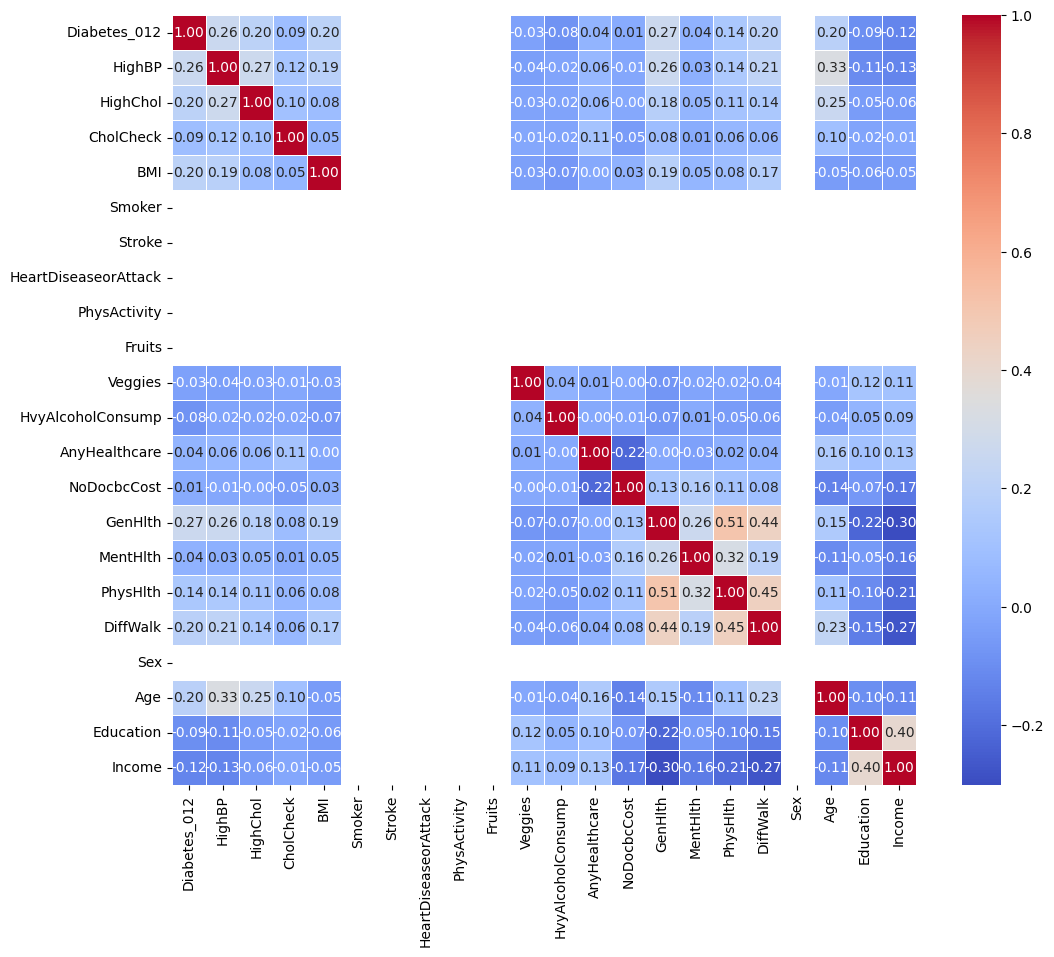

In [ ]:
# Menghitung matriks korelasi
correlation_matrix = df.corr()

# Menampilkan heatmap
plt.figure(figsize=(12, 10))  # Menentukan ukuran gambar jika diperlukan
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Menampilkan heatmap
plt.show()

Drop nilai yang dibawah 0,1

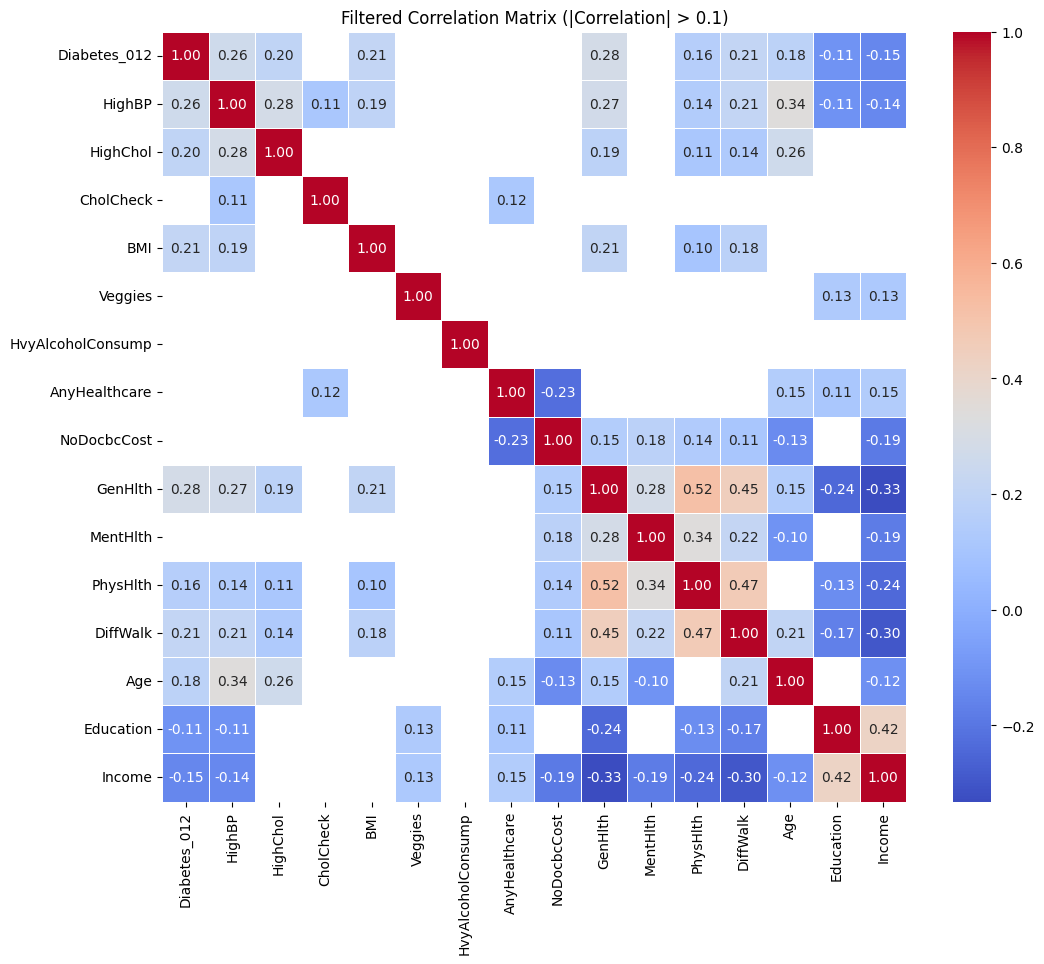

In [ ]:
# Menghitung matriks korelasi
correlation_matrix = df.corr()

# Menyaring matriks korelasi hanya untuk nilai korelasi absolut > 0.1
filtered_matrix = correlation_matrix.where(correlation_matrix.abs() > 0.1)

# Menghapus kolom dan baris yang sepenuhnya NaN (setelah menyaring nilai < 0.1)
filtered_matrix = filtered_matrix.dropna(how='all', axis=0).dropna(how='all', axis=1)

# Menampilkan heatmap dari hasil drop
plt.figure(figsize=(12, 10))  # Menentukan ukuran gambar jika diperlukan
sns.heatmap(filtered_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Filtered Correlation Matrix (|Correlation| > 0.1)")
plt.show()

## b. imbalance value

In [ ]:
fraud_counts = df['Diabetes_012'].value_counts().reset_index()
fraud_counts.columns = ['Diabetes_012', 'Count']
print(fraud_counts)

   Diabetes_012   Count
0           0.0  156342
1           2.0   33341
2           1.0    4574


In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


Distribusi sebelum sampling

Diabetes_012
0.0    156342
2.0     33341
1.0      4574
Name: count, dtype: int64


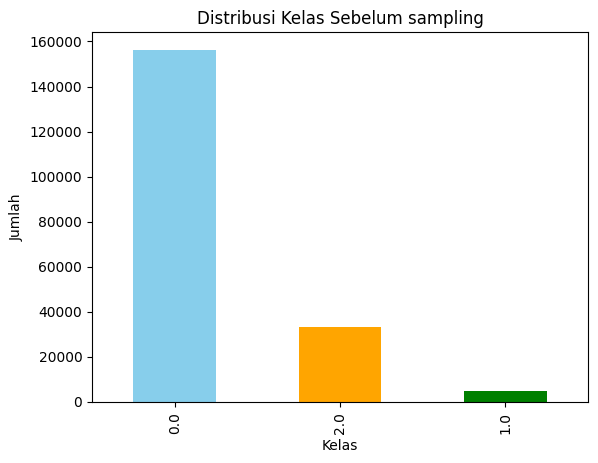

In [ ]:
# Cek distribusi awal
print(df['Diabetes_012'].value_counts())

# Visualisasi distribusi awal
df['Diabetes_012'].value_counts().plot(kind='bar', color=['skyblue', 'orange', 'green'])
plt.title('Distribusi Kelas Sebelum sampling')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.show()

Oversampling

Distribusi kelas setelah Oversampling:
Diabetes_012
0.0    156342
1.0    156342
2.0    156342
Name: count, dtype: int64


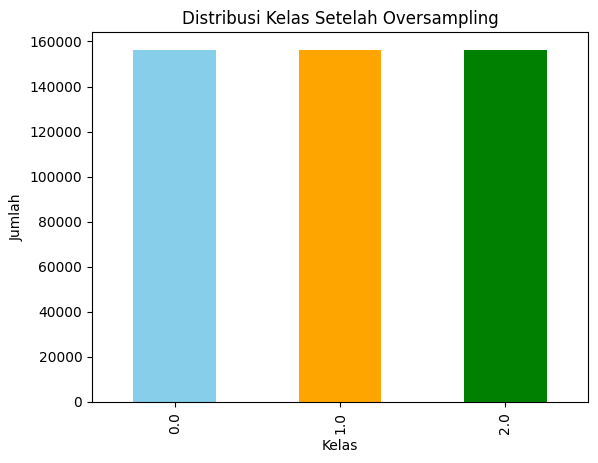

In [ ]:
from sklearn.utils import resample

df_class_0 = df[df['Diabetes_012'] == 0]
df_class_1 = df[df['Diabetes_012'] == 1]
df_class_2 = df[df['Diabetes_012'] == 2]

majority_size = max(len(df_class_0), len(df_class_1), len(df_class_2))

df_class_0_over = resample(df_class_0, replace=True, n_samples=majority_size, random_state=42)
df_class_1_over = resample(df_class_1, replace=True, n_samples=majority_size, random_state=42)
df_class_2_over = resample(df_class_2, replace=True, n_samples=majority_size, random_state=42)

df_oversampled = pd.concat([df_class_0_over, df_class_1_over, df_class_2_over])

print("Distribusi kelas setelah Oversampling:")
print(df_oversampled['Diabetes_012'].value_counts())

df_oversampled.reset_index(drop=True, inplace=True)
df_oversampled.head()

df_oversampled['Diabetes_012'].value_counts().plot(kind='bar', color=['skyblue', 'orange', 'green'])
plt.title('Distribusi Kelas Setelah Oversampling')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.show()

undersampling

Distribusi kelas setelah undersampling:
Diabetes_012
0.0    4574
1.0    4574
2.0    4574
Name: count, dtype: int64


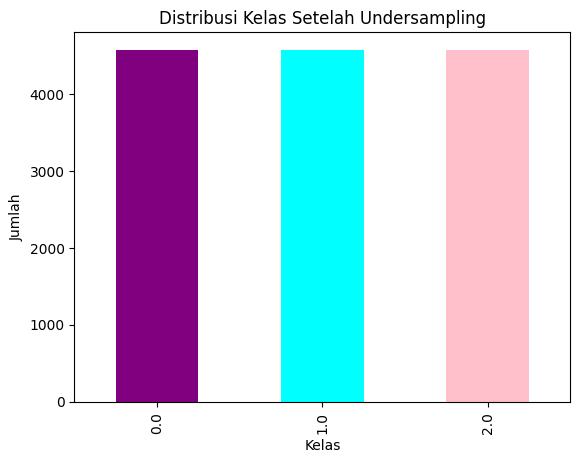

In [ ]:
# Tentukan jumlah sampel yang diinginkan (sama dengan kelas minoritas)
minority_size = min(len(df_class_0), len(df_class_1), len(df_class_2))

# Undersample kelas mayoritas
df_class_0_under = resample(df_class_0, replace=False, n_samples=minority_size, random_state=42)
df_class_1_under = resample(df_class_1, replace=False, n_samples=minority_size, random_state=42)
df_class_2_under = resample(df_class_2, replace=False, n_samples=minority_size, random_state=42)

# Gabungkan kembali data
df_undersampled = pd.concat([df_class_0_under, df_class_1_under, df_class_2_under])

print("Distribusi kelas setelah undersampling:")
print(df_undersampled['Diabetes_012'].value_counts())

df_undersampled.reset_index(drop=True, inplace=True)
df_undersampled.head()

df_undersampled['Diabetes_012'].value_counts().plot(kind='bar', color=['purple', 'cyan', 'pink'])
plt.title('Distribusi Kelas Setelah Undersampling')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.show()


## c. Outlier

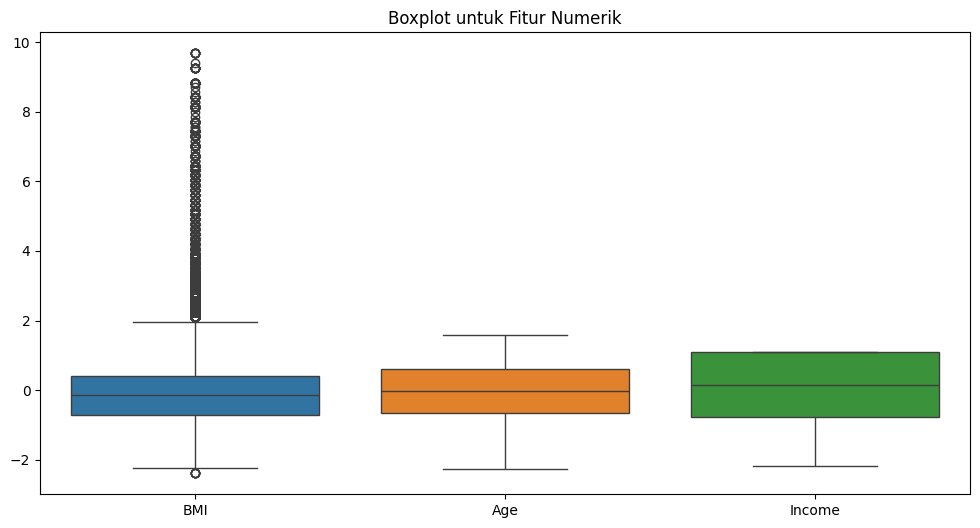

In [ ]:
# Menampilkan boxplot untuk beberapa kolom numerik
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['BMI', 'Age', 'Income']])
plt.title('Boxplot untuk Fitur Numerik')
plt.show()


In [ ]:
from scipy.stats import zscore

df_outliers = df_oversampled.head()
numerical_columns = df_outliers.select_dtypes(include=['float64', 'int64']).columns

z_scores = df_outliers[numerical_columns].apply(zscore)
threshold = 3

for col in numerical_columns:
    df_outliers.loc[(z_scores[col] > threshold) | (z_scores[col] < -threshold), col] = \
        df_outliers[col][(z_scores[col] <= threshold) & (z_scores[col] >= -threshold)].mean()

print(df_outliers.describe())

       Diabetes_012    HighBP  HighChol  CholCheck       BMI  Smoker  Stroke  \
count           5.0  5.000000  5.000000        5.0  5.000000     0.0     0.0   
mean            0.0  0.200000  0.400000        1.0  0.166486     NaN     NaN   
std             0.0  0.447214  0.547723        0.0  0.689902     NaN     NaN   
min             0.0  0.000000  0.000000        1.0 -0.983503     NaN     NaN   
25%             0.0  0.000000  0.000000        1.0  0.138438     NaN     NaN   
50%             0.0  0.000000  0.000000        1.0  0.278680     NaN     NaN   
75%             0.0  0.000000  1.000000        1.0  0.699408     NaN     NaN   
max             0.0  1.000000  1.000000        1.0  0.699408     NaN     NaN   

       HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
count                   0.0           0.0     0.0  ...            5.0   
mean                    NaN           NaN     NaN  ...            1.0   
std                     NaN           NaN     NaN  ...      

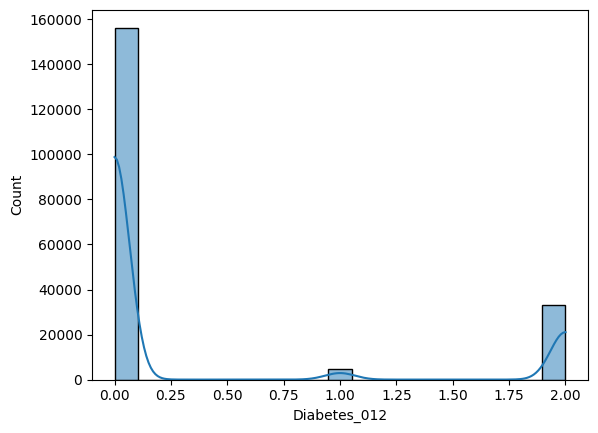

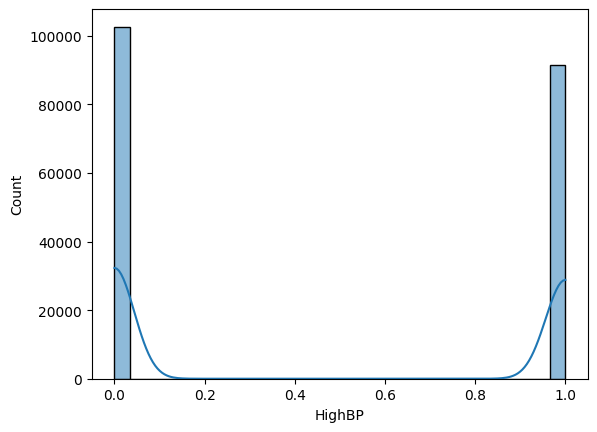

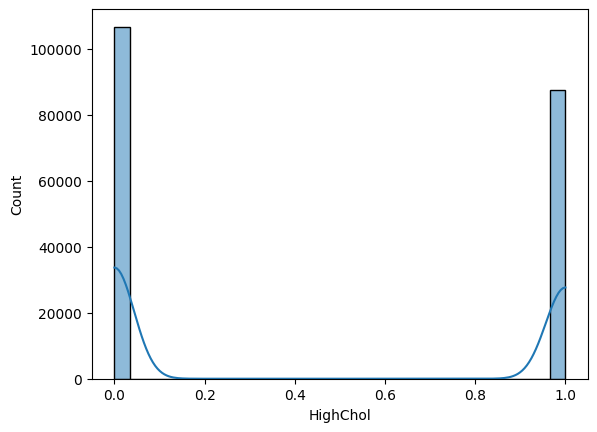

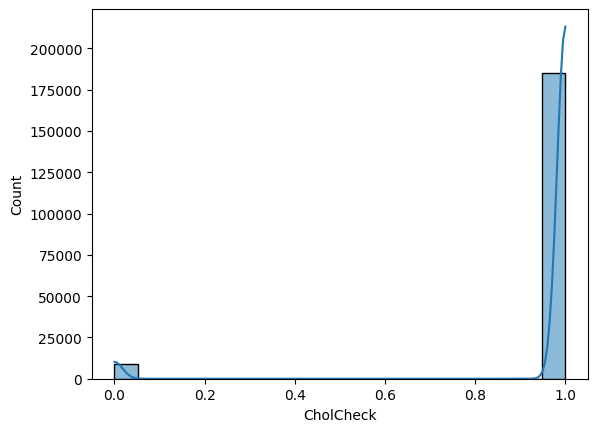

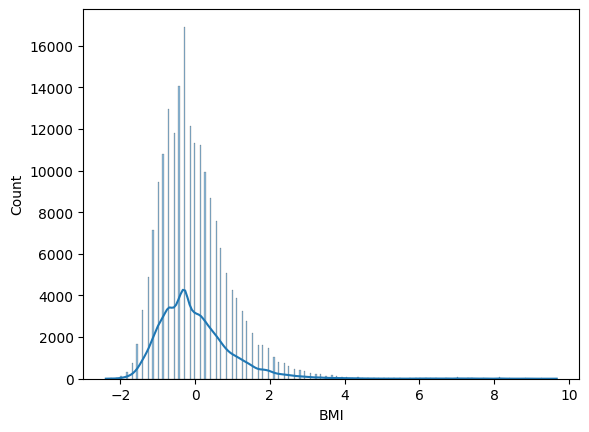

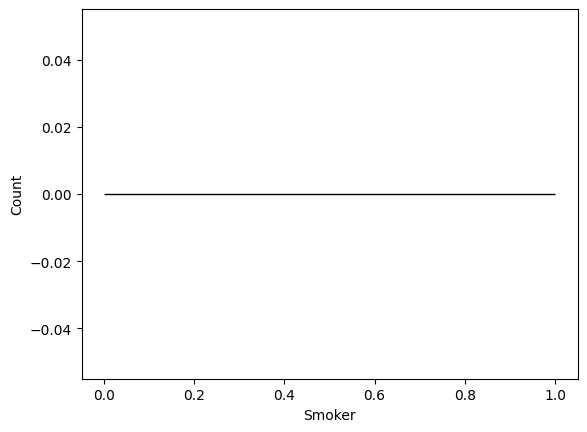

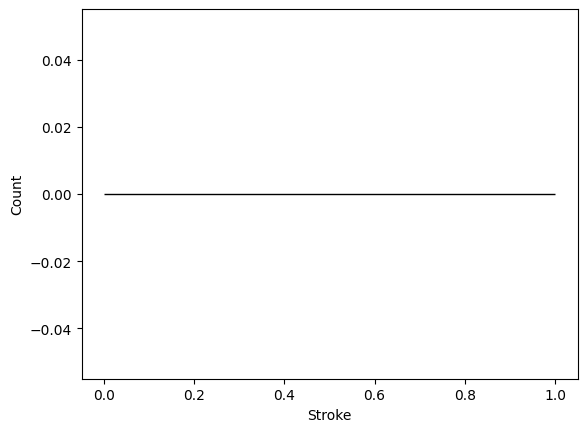

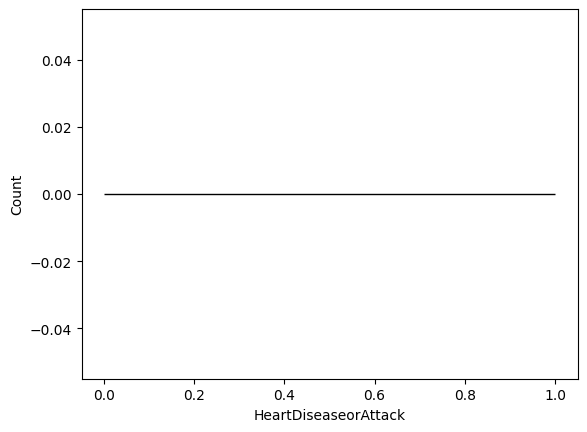

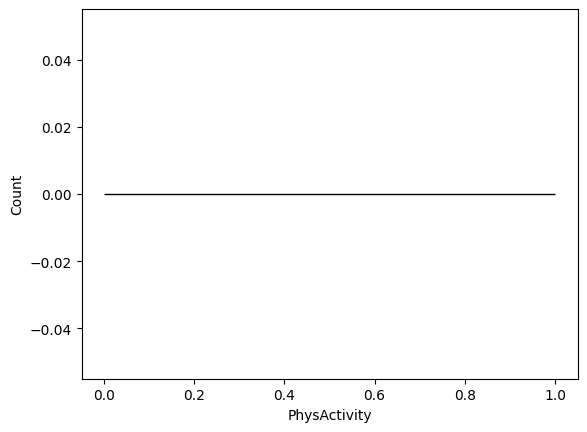

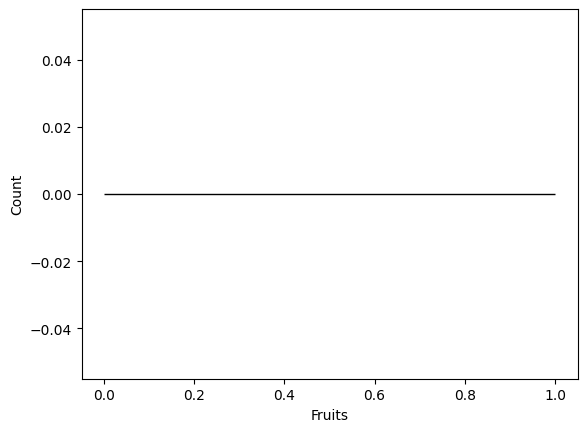

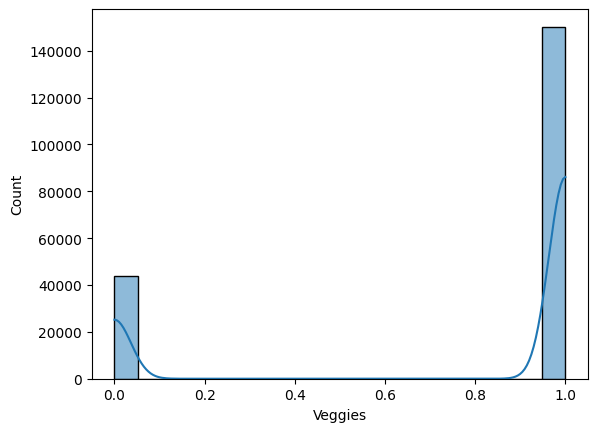

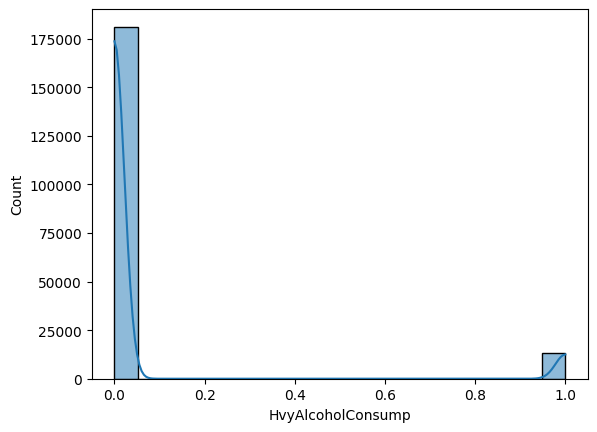

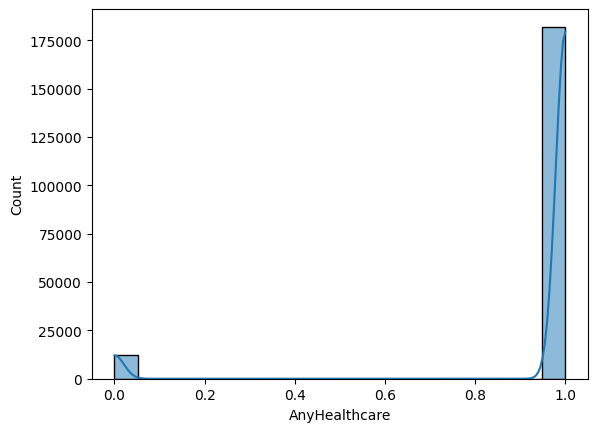

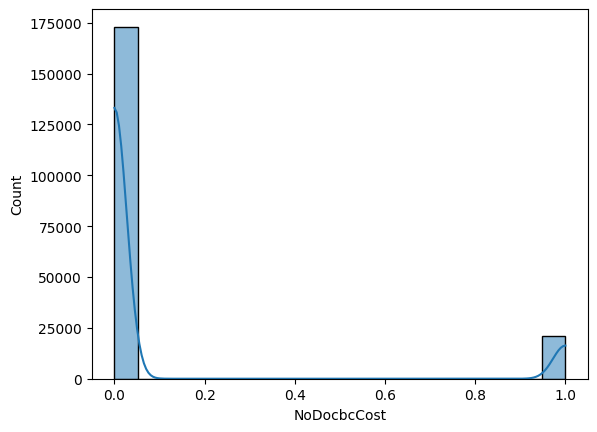

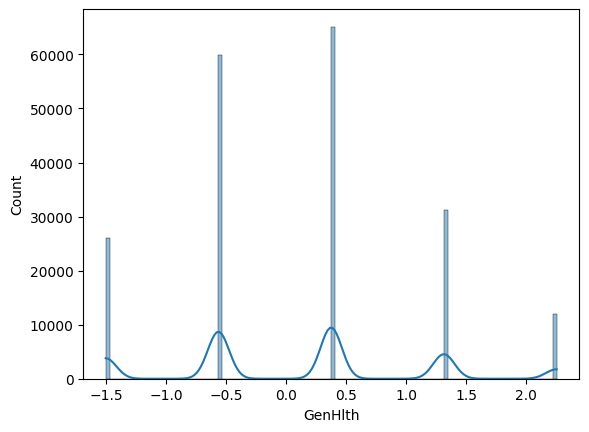

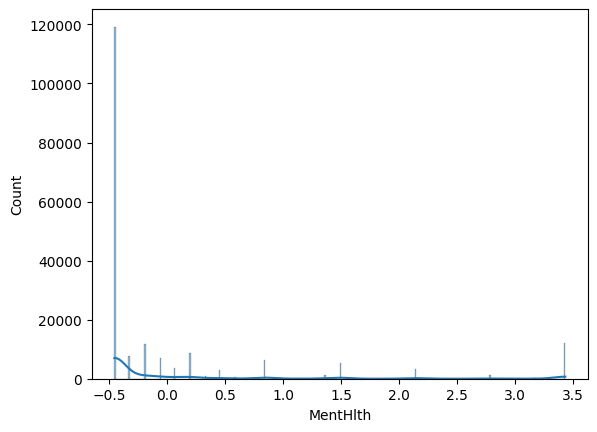

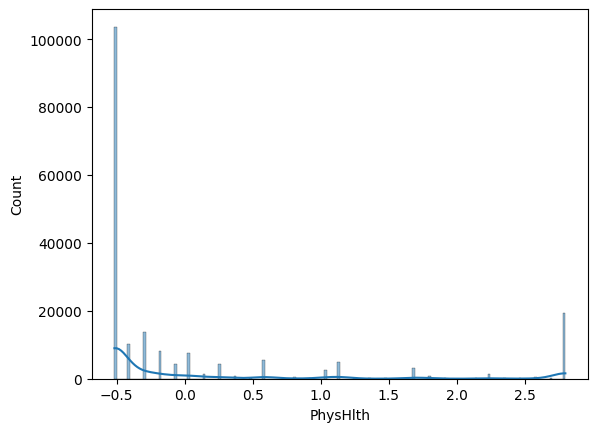

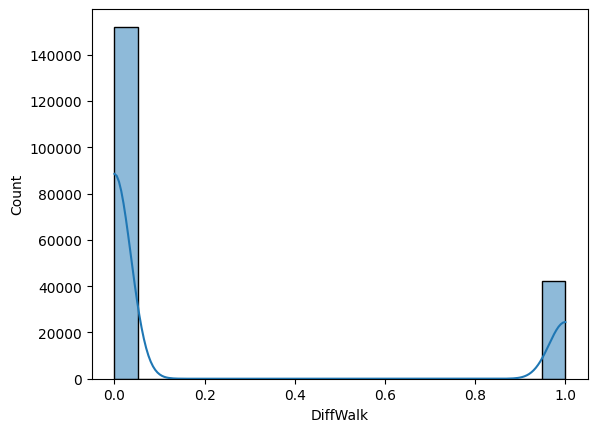

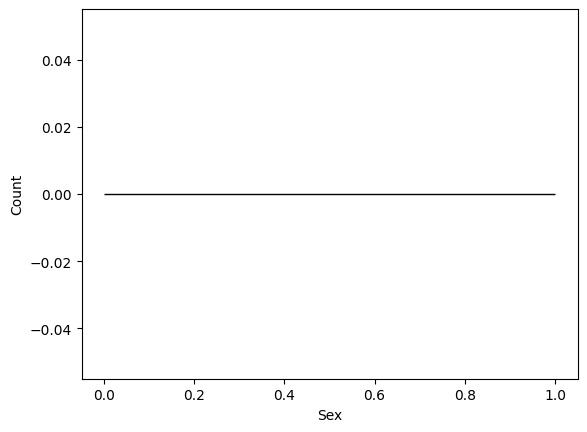

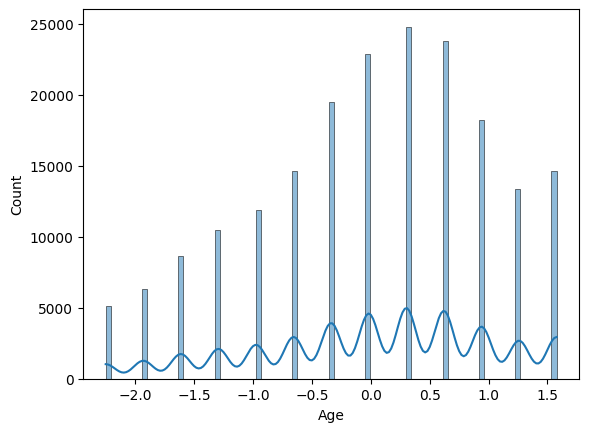

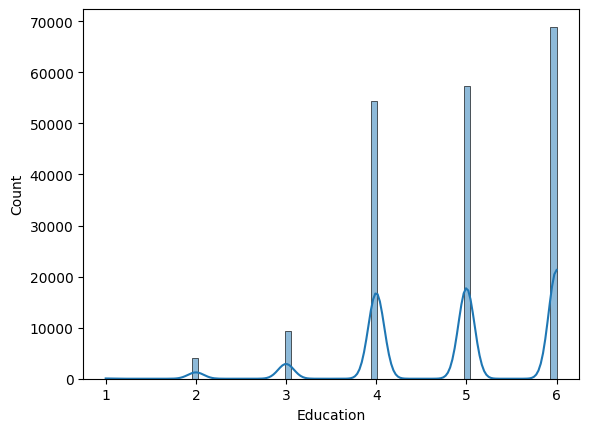

In [ ]:
for col in df.columns[:-1]:
    sns.histplot(df[col], kde=True)
    plt.show()


## c. Encoding

In [ ]:
print(df.columns)

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler


# Daftar kolom untuk label encoding (kolom kategori biner)
label_columns = [
    'Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
    'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'AnyHealthcare',
    'NoDocbcCost', 'DiffWalk', 'Sex'
]

# Daftar kolom numerik untuk standarisasi
numerical_columns = ['BMI', 'Age', 'GenHlth', 'MentHlth', 'PhysHlth']

# Kolom kategori multikelas yang sudah dalam bentuk encoded (tidak perlu One-Hot Encoding)
encoded_columns = ['Education', 'Income']

# Label Encoding untuk kolom kategori biner
label_encoder = LabelEncoder()
for column in label_columns:
    if column in df.columns:  # Pastikan kolom ada dalam dataset
        df[column] = label_encoder.fit_transform(df[column])

# Standarisasi kolom numerik
scaler = StandardScaler()
if all(col in df.columns for col in numerical_columns):  # Pastikan semua kolom ada
    df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Validasi hasil encoding dan standarisasi
print("Nilai unik untuk kolom kategori biner setelah encoding:")
for column in label_columns:
    print(f"{column}: {df[column].unique()}")

print("\nStatistik deskriptif untuk kolom numerik setelah standarisasi:")
print(df[numerical_columns].describe())

# Menampilkan DataFrame hasil
print("\nDataFrame setelah encoding dan standarisasi:")
print(df.head())


Nilai unik untuk kolom kategori biner setelah encoding:
Diabetes_012: [0 2 1]
HighBP: [1 0]
HighChol: [1 0]
CholCheck: [1 0]
Smoker: [0]
Stroke: [0]
HeartDiseaseorAttack: [0]
PhysActivity: [0]
Fruits: [0]
AnyHealthcare: [1 0]
NoDocbcCost: [0 1]
DiffWalk: [1 0]
Sex: [0]

Statistik deskriptif untuk kolom numerik setelah standarisasi:
                BMI           Age       GenHlth      MentHlth      PhysHlth
count  1.942570e+05  1.942570e+05  1.942570e+05  1.942570e+05  1.942570e+05
mean   1.404574e-17  2.926197e-18 -6.437633e-17  2.896935e-17  2.692101e-17
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00
min   -2.385928e+00 -2.250511e+00 -1.580124e+00 -4.991492e-01 -5.716856e-01
25%   -7.030176e-01 -6.554000e-01 -6.549036e-01 -4.991492e-01 -5.716856e-01
50%   -1.420474e-01 -1.735550e-02  2.703165e-01 -4.991492e-01 -5.716856e-01
75%    4.189228e-01  6.206890e-01  2.703165e-01 -1.342508e-01 -4.974941e-02
max    9.674930e+00  1.577756e+00  2.120757e+00  3.149834e

In [ ]:
# Transformasi Yeo-Johnson untuk kolom numerik
transformer = PowerTransformer(method='yeo-johnson', standardize=True)

# Melakukan transformasi untuk kolom numerik
df_transformasi = df.copy()
df_transformasi[numerical_columns] = transformer.fit_transform(df[numerical_columns])

# Menampilkan statistik deskriptif setelah transformasi
print("\nStatistik deskriptif setelah transformasi Yeo-Johnson:")
print(df_transformasi[numerical_columns].describe())

# Menampilkan DataFrame hasil setelah transformasi
print("\nDataFrame setelah transformasi Yeo-Johnson:")
print(df_transformasi.head())


Statistik deskriptif setelah transformasi Yeo-Johnson:
                BMI           Age       GenHlth      MentHlth      PhysHlth
count  1.942570e+05  1.942570e+05  1.942570e+05  1.942570e+05  1.942570e+05
mean   4.008889e-17  2.926197e-17 -1.638670e-17  8.720066e-17  1.521622e-17
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00
min   -4.232066e+00 -1.978750e+00 -1.678269e+00 -7.163928e-01 -7.926601e-01
25%   -7.411629e-01 -7.168949e-01 -6.309525e-01 -7.163928e-01 -7.926601e-01
50%    5.487309e-02 -1.192376e-01  3.234097e-01 -7.163928e-01 -7.926601e-01
75%    6.413264e-01  5.760374e-01  3.234097e-01  7.155409e-01  8.046606e-01
max    4.336088e+00  1.770539e+00  1.974097e+00  1.916973e+00  1.805686e+00

DataFrame setelah transformasi Yeo-Johnson:
   Diabetes_012  HighBP  HighChol  CholCheck       BMI  Smoker  Stroke  \
0             0       1         1          1  1.460595       0       0   
1             0       0         0          0 -0.522956       0     

## e. Scaling

In [ ]:
# Scaling menggunakan Z-score (StandardScaler)
df_scaling_z = df_transformasi.copy()  # Salin dataset untuk scaling
df_scaling_z[numerical_columns] = scaler.fit_transform(df_scaling_z[numerical_columns])

# Menampilkan statistik deskriptif setelah scaling dengan Z-score
print("\nStatistik deskriptif setelah scaling Z-score:")
print(df_scaling_z[numerical_columns].describe())

# Menampilkan DataFrame hasil scaling dengan Z-score
print("\nDataFrame setelah scaling Z-score:")
print(df_scaling_z.head())


Statistik deskriptif setelah scaling Z-score:
                BMI           Age       GenHlth      MentHlth      PhysHlth
count  1.942570e+05  1.942570e+05  1.942570e+05  1.942570e+05  1.942570e+05
mean   2.282433e-17  1.638670e-17 -1.638670e-17  1.463098e-17  8.251875e-17
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00
min   -4.232066e+00 -1.978750e+00 -1.678269e+00 -7.163928e-01 -7.926601e-01
25%   -7.411629e-01 -7.168949e-01 -6.309525e-01 -7.163928e-01 -7.926601e-01
50%    5.487309e-02 -1.192376e-01  3.234097e-01 -7.163928e-01 -7.926601e-01
75%    6.413264e-01  5.760374e-01  3.234097e-01  7.155409e-01  8.046606e-01
max    4.336088e+00  1.770539e+00  1.974097e+00  1.916973e+00  1.805686e+00

DataFrame setelah scaling Z-score:
   Diabetes_012  HighBP  HighChol  CholCheck       BMI  Smoker  Stroke  \
0             0       1         1          1  1.460595       0       0   
1             0       0         0          0 -0.522956       0       0   
2          

## f. Feature selection

Feature Importance berdasarkan Random Forest:
                 Feature  Importance
3                    BMI    0.233738
18                   Age    0.146935
20                Income    0.123315
15              PhysHlth    0.107840
19             Education    0.084489
14              MentHlth    0.081598
13               GenHlth    0.066877
0                 HighBP    0.044421
1               HighChol    0.026846
9                Veggies    0.024936
16              DiffWalk    0.019904
12           NoDocbcCost    0.016186
11         AnyHealthcare    0.009143
10     HvyAlcoholConsump    0.008636
2              CholCheck    0.005136
8                 Fruits    0.000000
7           PhysActivity    0.000000
6   HeartDiseaseorAttack    0.000000
5                 Stroke    0.000000
17                   Sex    0.000000
4                 Smoker    0.000000


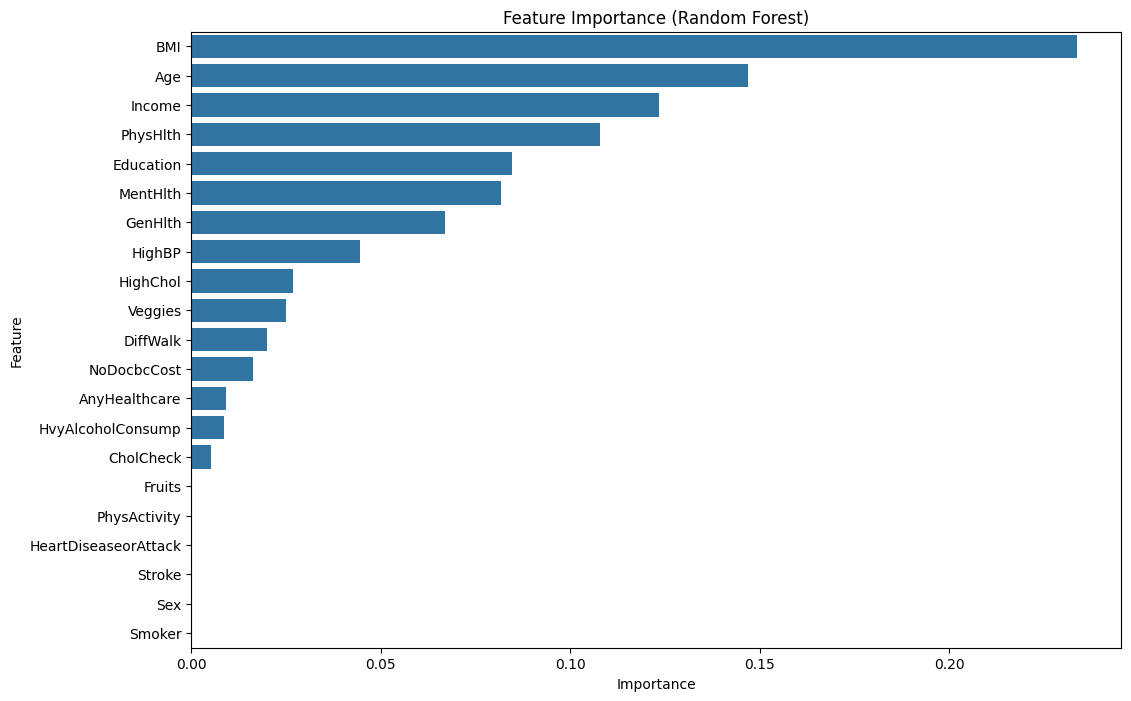

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Pisahkan fitur dan target
X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

# Random Forest untuk menilai pentingnya fitur
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X, y)

# Tampilkan feature importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model_rf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print("Feature Importance berdasarkan Random Forest:")
print(feature_importances)

# Visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Feature Importance (Random Forest)")
plt.show()


Feature Importance berdasarkan Random Forest (tanpa yang 0):
              Feature  Importance
3                 BMI    0.233738
18                Age    0.146935
20             Income    0.123315
15           PhysHlth    0.107840
19          Education    0.084489
14           MentHlth    0.081598
13            GenHlth    0.066877
0              HighBP    0.044421
1            HighChol    0.026846
9             Veggies    0.024936
16           DiffWalk    0.019904
12        NoDocbcCost    0.016186
11      AnyHealthcare    0.009143
10  HvyAlcoholConsump    0.008636
2           CholCheck    0.005136


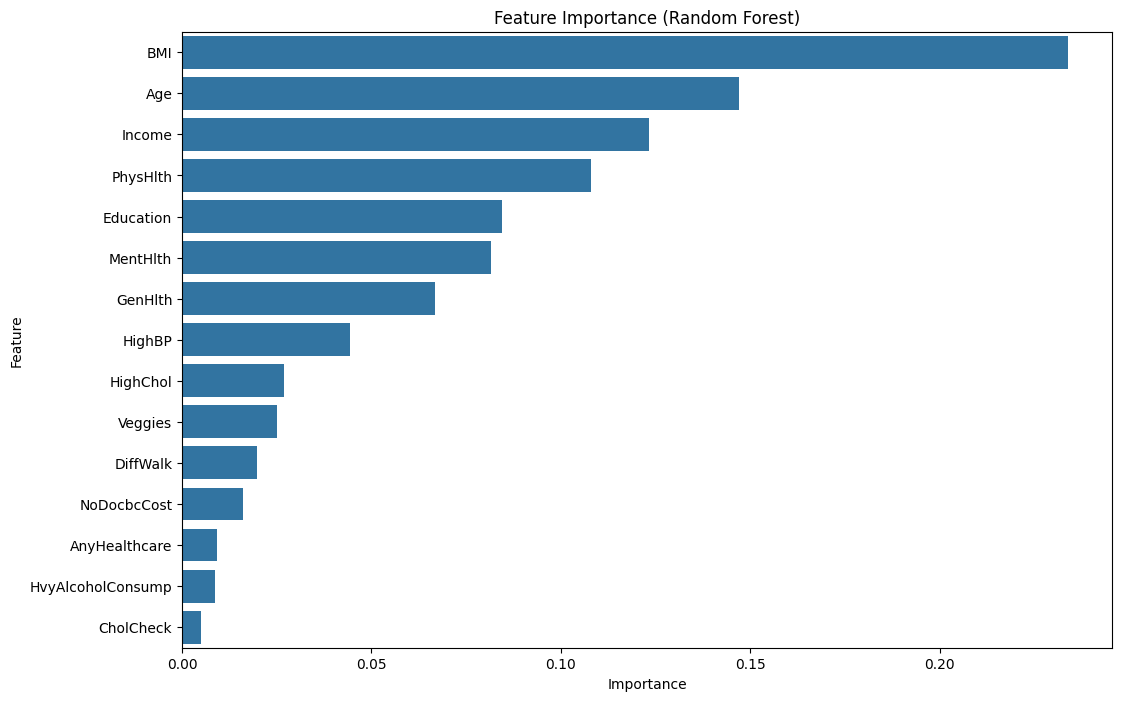

In [ ]:
# Hapus fitur dengan importance 0
feature_importances = feature_importances[feature_importances['Importance'] > 0]

print("Feature Importance berdasarkan Random Forest (tanpa yang 0):")
print(feature_importances)

# Visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Feature Importance (Random Forest)")
plt.show()

In [ ]:
# Pisahkan fitur dan target
X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

# Standarisasi (Scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
# Pilih fitur dengan importance > 0.1
selected_features = feature_importances[feature_importances['Importance'] > 0.1]['Feature'].tolist()
print("Fitur terpilih:", selected_features)

# Dataset baru dengan fitur terpilih
X_selected = pd.DataFrame(X_scaled, columns=X.columns)[selected_features]


Fitur terpilih: ['BMI', 'Age', 'Income', 'PhysHlth']


## Penerapan Machine Learning

In [ ]:
# Dataset baru setelah penghapusan kolom tertentu
df2 = df.drop(columns=['Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Sex', 'HvyAlcoholConsump'])

# Pisahkan fitur dan target
X = df2.drop('Diabetes_012', axis=1)
y = df2['Diabetes_012']

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Menangani ketidakseimbangan kelas menggunakan SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


## Algoritma & Metrik Evaluation

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


# Check target distribution
target = 'Diabetes_012'
print("Target Distribution:")
print(df[target].value_counts(normalize=True) * 100)

# Split features and target
X = df.drop(columns=[target])
y = df[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Models to evaluate
models = {
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train_smote)
    y_pred = model.predict(X_test_scaled)

    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    results[name] = {
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))

# Print summary results
results_df = pd.DataFrame(results).T
print("\nSummary of Metrics:")
print(results_df)

# Correlation analysis for feature importance
correlation = df.corr()
print("\nFeature Correlation with Target:")
print(correlation[target].sort_values(ascending=False))


Target Distribution:
Diabetes_012
0    80.482042
2    17.163345
1     2.354613
Name: proportion, dtype: float64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(



KNN Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.63      0.74     46903
           1       0.03      0.13      0.04      1372
           2       0.29      0.51      0.37     10003

    accuracy                           0.60     58278
   macro avg       0.40      0.43      0.38     58278
weighted avg       0.76      0.60      0.66     58278


Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.88      0.86     46903
           1       0.02      0.01      0.01      1372
           2       0.37      0.33      0.35     10003

    accuracy                           0.76     58278
   macro avg       0.41      0.41      0.41     58278
weighted avg       0.74      0.76      0.75     58278


Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.80      0.82     46903
           1       0.0

Kode diawali dengan impor pustaka seperti:
- pandas, numpy: Untuk manipulasi data.
- matplotlib, seaborn: Untuk visualisasi data.
- scikit-learn: Untuk preprocessing, algoritma, dan evaluasi model.
- imbalearn: Untuk menangani ketidakseimbangan data menggunakan SMOTE.


---


Dataset dimuat menggunakan pd.read_csv(), dan eksplorasi awal dilakukan:
- df.shape: Menampilkan jumlah baris dan kolom.
-  df.head(): Melihat sampel data.
-  df.info() dan df.describe(): Mendapatkan informasi tipe data dan statistik deskriptif.


---


Data Cleaning:
- Duplikasi: Menghapus duplikasi dengan df.drop_duplicates().
- Nilai Kosong: Mengisi nilai kosong dengan rata-rata menggunakan SimpleImputer.


---


Menangani Ketidakseimbangan Kelas
- SMOTE: Membuat distribusi kelas menjadi seimbang dengan menghasilkan data sintetis.
- Oversampling/Undersampling: Menambah atau mengurangi sampel untuk kelas minoritas/majoritas.


---


Analisis dan Transformasi Data
- Analisis Statistik: Menggunakan fungsi khusus untuk menghitung nilai maksimum, minimum, mean, skewness, dll.
- Transformasi Data:
1. Encoding untuk kolom kategorikal seperti Sex dan Smoker.
2. Scaling data numerik menggunakan StandardScaler.
3. Transformasi Yeo-Johnson untuk membuat distribusi lebih normal.


---


Pemodelan dan Evaluasi
- Model yang Digunakan:
1. KNN (K-Nearest Neighbors).
2. Random Forest Classifier.
3. Decision Tree Classifier.
- Evaluasi: Menggunakan metrik seperti:
1. Precision
2. Recall
3. F1 Score
4. Confusion Matrix.

Menampilkan visualisasi:
- Heatmap korelasi antar fitur.
- Boxplot untuk mendeteksi outlier.
- Distribusi kelas sebelum dan sesudah SMOTE.



---



PENJELASAN OUTPUT:
1. Eksplorasi Data
- Tujuan: Memahami ukuran dan isi dataset.
- Hasil: Dataset memiliki banyak baris (data individu) dan kolom (fitur kesehatan). Contohnya, ada data tentang tekanan darah tinggi, kolesterol, aktivitas fisik, dan apakah seseorang menderita diabetes atau tidak.
- Output Tambahan: Informasi tentang tipe data di setiap kolom (angka atau teks), nilai kosong, dan statistik seperti rata-rata atau nilai maksimum dari tiap kolom.

2. Pembersihan Data
Data seringkali tidak sempurna, jadi langkah ini memastikan data bersih:
- Duplikasi: Baris yang sama persis dihapus.
- Nilai Kosong: Nilai yang hilang diisi dengan rata-rata atau metode lain agar dataset tetap lengkap.

3. Distribusi Kelas
Dataset seringkali tidak seimbang, di mana jumlah data pada satu kelompok (contohnya, orang sehat) jauh lebih banyak dibanding kelompok lain (contohnya, penderita diabetes).
- Hasil: Grafik menunjukkan perbedaan besar dalam jumlah kelas.
- Masalah: Ketidakseimbangan ini dapat membuat model tidak akurat karena terlalu fokus pada kelas yang dominan.

4. Transformasi dan Standarisasi Data
Untuk mempersiapkan data:
- Data Kategorikal: Contoh, kolom "Jenis Kelamin" diubah menjadi angka (0 untuk pria, 1 untuk wanita).
- Scaling: Data numerik seperti usia dan pendapatan diubah ke skala standar agar lebih seragam dan mudah diproses oleh model.

5. Analisis Korelasi
Langkah ini mengevaluasi hubungan antar kolom:
- Tujuan: Melihat kolom mana yang paling berpengaruh terhadap risiko diabetes.
- Hasil: Ditampilkan dalam bentuk peta panas (heatmap). Kolom dengan korelasi rendah diabaikan agar model hanya menggunakan informasi yang relevan.

6. Penyeimbangan Data
Karena distribusi kelas tidak seimbang:
- Oversampling: Data sintetis ditambahkan untuk kelas yang kurang, sehingga jumlah tiap kelompok menjadi sama.
- Visualisasi: Grafik menunjukkan distribusi baru yang seimbang setelah proses ini.

7. Deteksi dan Penanganan Outlier
- Outlier: Nilai yang sangat berbeda dari data lainnya (contohnya, seseorang dengan BMI sangat tinggi). Ini dapat mengganggu akurasi model.
- Hasil: Ditampilkan dalam bentuk grafik boxplot. Nilai ekstrem diganti dengan nilai rata-rata untuk menjaga stabilitas model.

8. Seleksi Fitur
Tidak semua kolom data penting untuk model:
- Tujuan: Menentukan fitur (kolom) mana yang paling berpengaruh terhadap prediksi diabetes.
- Hasil: Fitur penting seperti BMI, usia, dan tingkat aktivitas fisik diidentifikasi. Fitur yang tidak relevan dihapus.

9. Pemodelan Machine Learning
Beberapa algoritma pembelajaran mesin digunakan untuk membangun model prediksi, seperti:
- KNN (K-Nearest Neighbors): Menentukan risiko diabetes berdasarkan data individu yang mirip.
- Random Forest: Menggunakan banyak pohon keputusan untuk membuat prediksi yang akurat.
- Decision Tree: Membuat keputusan berdasarkan fitur tertentu, misalnya jika BMI tinggi maka risiko diabetes tinggi.

10. Evaluasi Model
Setelah model dilatih, kinerjanya diuji menggunakan metrik seperti:
- Precision: Seberapa tepat model dalam memprediksi diabetes.
- Recall: Seberapa baik model mendeteksi semua kasus diabetes.
F1 Score: Kombinasi antara precision dan recall.
- Hasil: Model terbaik dipilih berdasarkan kinerja metrik tersebut.

11. Output Akhir
- Laporan: Hasil evaluasi disajikan dalam tabel perbandingan antara model (contohnya, Random Forest mungkin lebih baik daripada KNN).
- Kesimpulan: Algoritma terbaik dapat digunakan untuk memprediksi risiko diabetes pada data baru.